# Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#for visualisation and graphing
import matplotlib.pyplot as plt 
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import randint

#for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

#for models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

#for validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#for neural network
from sklearn.model_selection import RandomizedSearchCV

# Importing the data

In [2]:
#mh = mental health
techmhData = pd.read_csv('survey.csv')

# Dataset description

In [3]:
#printing the column names
print(techmhData.columns)

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


In [4]:
#getting the first five rows of the df
techmhData.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
#getting the number of rows and columns of the df
techmhData.shape

(1259, 27)

In [6]:
#produces descriptive statistics of the dataset
techmhData.describe(include='all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:54:11,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#checking the datatypes of each column
techmhData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

# Data Pre-processing - Cleaning 

In [8]:
#finding the missing values 
techmhData.isna()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1255,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1256,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1257,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [9]:
#^ there is a few missing values - (true (where there is a missing values) false (no missing value) )

#get the number of missing values of each column
techmhData.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [10]:
#^ there are 4 columns with missing values

#using mean over the rows (to add up all the trues and divide it by the total number in each column, to get the % missing values in each column)
techmhData.isna().mean()

Timestamp                    0.000000
Age                          0.000000
Gender                       0.000000
Country                      0.000000
state                        0.409055
self_employed                0.014297
family_history               0.000000
treatment                    0.000000
work_interfere               0.209690
no_employees                 0.000000
remote_work                  0.000000
tech_company                 0.000000
benefits                     0.000000
care_options                 0.000000
wellness_program             0.000000
seek_help                    0.000000
anonymity                    0.000000
leave                        0.000000
mental_health_consequence    0.000000
phys_health_consequence      0.000000
coworkers                    0.000000
supervisor                   0.000000
mental_health_interview      0.000000
phys_health_interview        0.000000
mental_vs_physical           0.000000
obs_consequence              0.000000
comments    

In [11]:
#^ 40% of the values are missing in state (40% is a high number but state is only applicable if the country is US)
#Dropping the columns "Timestamp", "comments" and "state" ("self_employed will be filled as its a low number")
techmhData = techmhData.drop(['comments'], axis= 1)
techmhData = techmhData.drop(['state'], axis= 1)
techmhData = techmhData.drop(['Timestamp'], axis= 1)

In [12]:
#checking for missing values
techmhData.isnull().sum().max()

264

In [13]:
#checking the amended rows
techmhData.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


# Data Cleaning NaN (not a number)

In [14]:
#assigning default values
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

In [15]:
#converting the specified value 
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

In [16]:
#cleaning NaN
for feature in techmhData:
    if feature in intFeatures:
        techmhData[feature] = techmhData[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        techmhData[feature] = techmhData[feature].fillna(defaultString)
    elif feature in floatFeatures:
        techmhData[feature] = techmhData[feature].fillna(defaultFloat)
    else:
        print('Error : Feature %s not recognized.' % feature)

techmhData.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


# Data Cleaning "Gender" column

In [17]:
#lower case all elements
gender = techmhData['Gender'].str.lower()

In [18]:
#selecting unique elements
gender = techmhData['Gender'].unique()

In [19]:
#different gender groupings
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]

female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]

In [20]:
#iterating each row
for (row, col) in techmhData.iterrows():
    if str.lower(col.Gender) in male_str:
        techmhData['Gender'].replace(to_replace = col.Gender, value = 'male', inplace = True)
    
    if str.lower(col.Gender) in female_str:
        techmhData['Gender'].replace(to_replace = col.Gender, value = 'female', inplace = True)
        
    if str.lower(col.Gender) in trans_str:
        techmhData['Gender'].replace(to_replace = col.Gender, value = 'trans', inplace = True)
    

random_list = ['A little about you', 'p']
techmhData = techmhData[~techmhData['Gender'].isin(random_list)]

In [21]:
#checking for unique elements in Gender column
print(techmhData['Gender'].unique())

['female' 'male' 'trans']


# Data Cleaning "Age" column

In [22]:
#fill missing elements with mean
techmhData['Age'].fillna(techmhData['Age'].median(), inplace = True)

In [23]:
#fill with median values < 18 and > 120
s = pd.Series(techmhData['Age'])
s[s<18] = techmhData['Age'].median()
techmhData['Age'] = s
s = pd.Series(techmhData['Age'])
s[s>120] = techmhData['Age'].median()
techmhData['Age'] = s

In [24]:
#ranges of age
techmhData['age_range'] = pd.cut(techmhData['Age'], [0,20,30,65,100], labels = ["0-20", "21-30", "31-65", "66-100"], include_lowest = True)

# Data Cleaning "self_employed" column

In [25]:
techmhData['self_employed'] = techmhData['self_employed'].replace([defaultString], 'No')
print(techmhData['self_employed'].unique())

['No' 'Yes']


# Data Cleaning "work interfere" column

In [26]:
techmhData['work_interfere'] = techmhData['work_interfere'].replace([defaultString], 'Don\'t know')
print(techmhData['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


# Data Pre-processing - Encoding

In [27]:
labelDict = {}
for feature in techmhData:
    le = preprocessing.LabelEncoder()
    le.fit(techmhData[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    techmhData[feature] = le.transform(techmhData[feature])
    
#get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

techmhData.head()

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_emp

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,44,0,0,1,2,4,0,1,...,2,1,1,1,2,1,0,2,0,2
1,26,1,44,0,0,0,3,5,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,6,0,0,0,3,4,0,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,43,0,1,1,2,2,0,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,44,0,0,0,1,1,1,1,...,0,1,1,1,2,2,2,0,0,2


In [28]:
#check for missing data
total = techmhData.isnull().sum().sort_values(ascending = False)
percent = (techmhData.isnull().sum() / techmhData.isnull().count()).sort_values(ascending = False)
missing_techmhData = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_techmhData.head()
print(missing_techmhData)

                           Total  Percent
age_range                      0      0.0
care_options                   0      0.0
Gender                         0      0.0
Country                        0      0.0
self_employed                  0      0.0
family_history                 0      0.0
treatment                      0      0.0
work_interfere                 0      0.0
no_employees                   0      0.0
remote_work                    0      0.0
tech_company                   0      0.0
benefits                       0      0.0
wellness_program               0      0.0
obs_consequence                0      0.0
seek_help                      0      0.0
anonymity                      0      0.0
leave                          0      0.0
mental_health_consequence      0      0.0
phys_health_consequence        0      0.0
coworkers                      0      0.0
supervisor                     0      0.0
mental_health_interview        0      0.0
phys_health_interview          0  

# Visualisation - Correlation Matrix

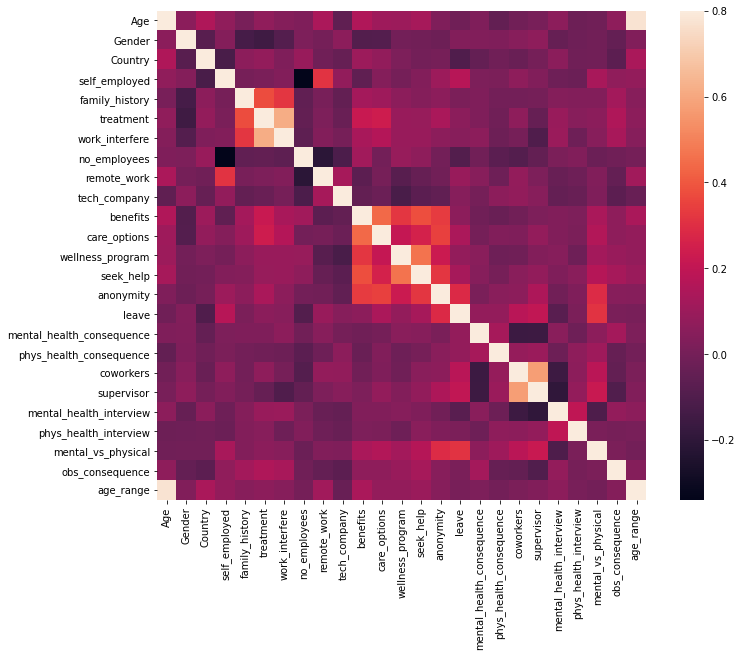

In [29]:
#variability comparison between categories of variables using correlation matrix
corrmat = techmhData.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

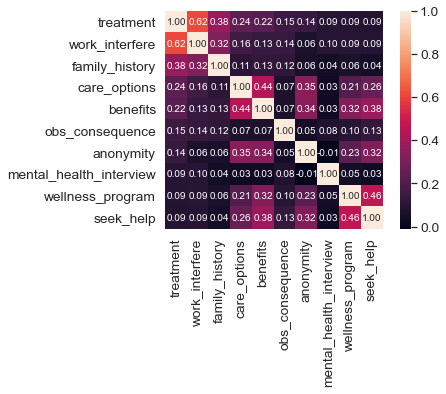

In [30]:
#"treatment" correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(techmhData[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Visualisation - with Exploratory Data Analysis

Text(0.5, 0, 'Age')

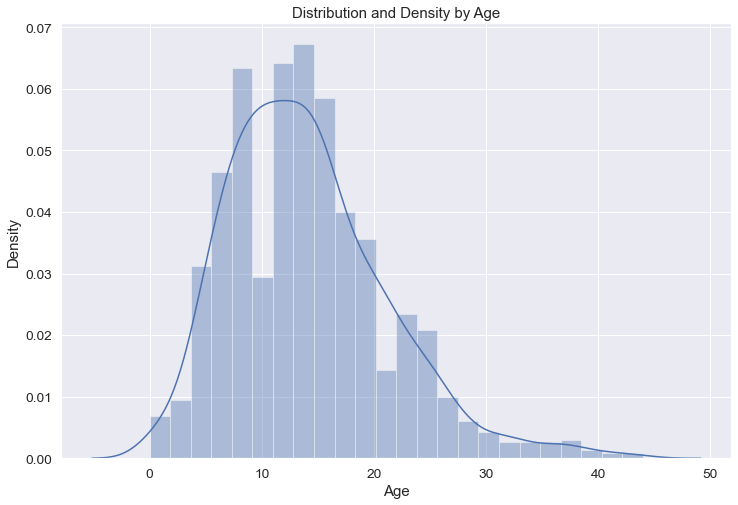

In [31]:
#distribution and density by "Age"
plt.figure(figsize=(12,8))
sns.distplot(techmhData["Age"], bins=24)
plt.title("Distribution and Density by Age")
plt.xlabel("Age")

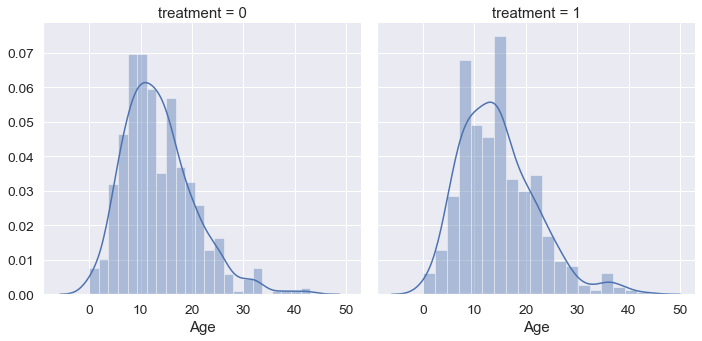

In [32]:
#separate by "treatment" (treated) or not
g = sns.FacetGrid(techmhData, col='treatment', size=5)
g = g.map(sns.distplot, "Age")

Text(0.5, 1.0, 'Total Distribution by employees who have been treated or not')

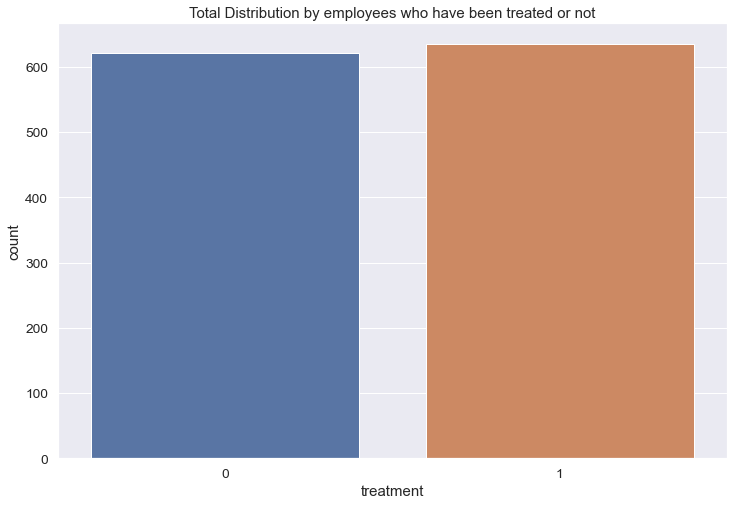

In [33]:
#how many people (by "gender") have been treated
plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
g = sns.countplot(x="treatment", data=techmhData)
# g.set_xticklabels(labels)

plt.title('Total Distribution by employees who have been treated or not')

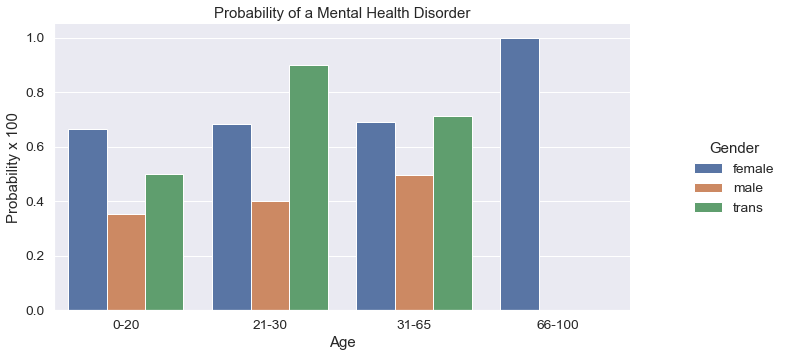

In [34]:
#nested barplot to show probabilities for "Age" and "Gender"
o = labelDict['label_age_range']

g = sns.factorplot(x="age_range", y="treatment", hue="Gender", data=techmhData, kind="bar",  ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)

plt.title('Probability of a Mental Health Disorder')
plt.ylabel('Probability x 100')
plt.xlabel('Age')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

#positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

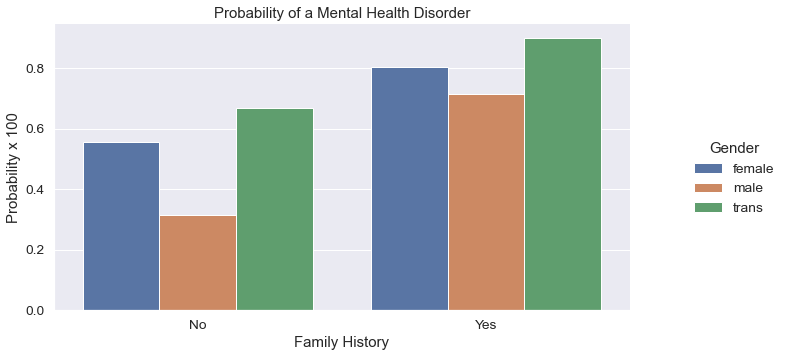

In [35]:
#barplot to show probabilities for "family_history"
o = labelDict['label_family_history']
g = sns.factorplot(x="family_history", y="treatment", hue="Gender", data=techmhData, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of a Mental Health Disorder')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

#replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

#positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

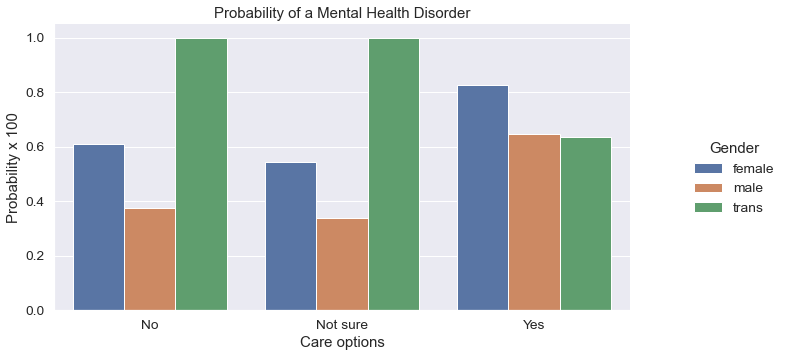

In [36]:
#barplot to show probabilities for "care_options"
o = labelDict['label_care_options']
g = sns.factorplot(x="care_options", y="treatment", hue="Gender", data=techmhData, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of a Mental Health Disorder')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

#replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

#positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

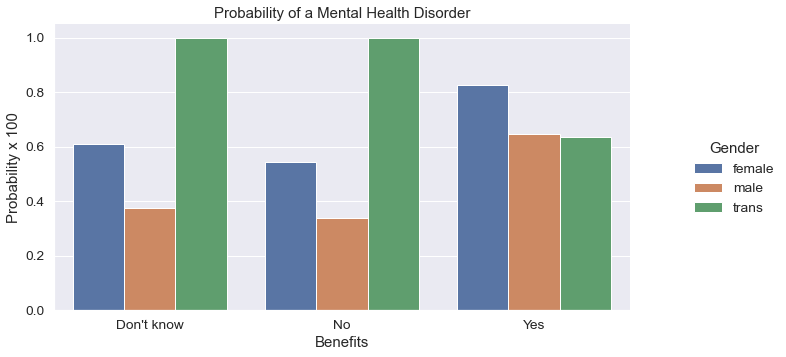

In [37]:
#barplot to show probabilities for "benefits"
o = labelDict['label_benefits']
g = sns.factorplot(x="care_options", y="treatment", hue="Gender", data=techmhData, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of a Mental Health Disorder')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

#replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

#positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

# Data Pre-processing - Scaling and Fitting

In [38]:
#scaling "Age"
scaler = MinMaxScaler()
techmhData['Age'] = scaler.fit_transform(techmhData[['Age']])
techmhData.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,44,0,0,1,2,4,0,1,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,44,0,0,0,3,5,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,6,0,0,0,3,4,0,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,43,0,1,1,2,2,0,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,44,0,0,0,1,1,1,1,...,0,1,1,1,2,2,2,0,0,2


In [39]:
#splitting the dataset

#define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = techmhData[feature_cols]
y = techmhData.treatment

#split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

#create dictionaries for final graph
#use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

# Feature Selection

In [40]:
#build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])

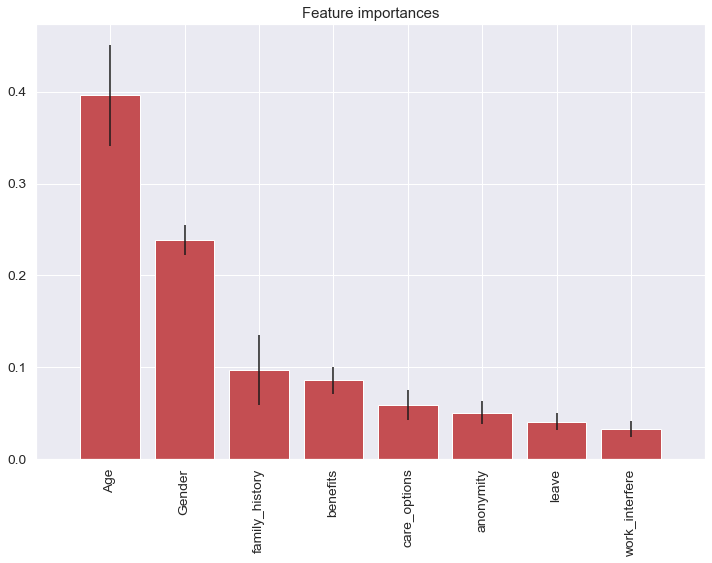

In [41]:
#plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

# Model Training 

# Evaluating a Classification Model

In [42]:
#this function will evaluate:
#classification accuracy, null accuracy, percentage of ones, percentage of zeros, confusion matrix, false positive rate, precision of positive value, AUC
def evalClassModel(model, y_test, y_pred_class, plot=False):
#Classification accuracy: percentage of correct predictions
# calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
#null accuracy: accuracy that could be achieved by always predicting the most frequent class
#examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
#calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
#calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
#comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
##^ classification accuracy ref: Ng, R., (2022). Machine Learning with Scikit-Learn - Evaluating a Classification Model. [online] www.ritchieng.com

#Confusion matrix

#save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
#[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
#visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
#metrics computed from a confusion matrix

#Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
#Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
#Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))

#first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
#calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())

##^ confusion matrix ref: Narkhede, S., 2018. Understanding Confusion Matrix. [online] towardsdatascience.com. & Ng, R., (2022). Machine Learning with Scikit-Learn - Evaluating a Classification Model. [online] www.ritchieng.com

    
###
#Adjusting the classification threshold
    
#print the first 10 predicted responses
#1D array (vector) of binary values (0, 1)
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])
    
#print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

#print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]
    
#store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot == True:
        
#histogram of predicted probabilities
#adjust the font size 
        plt.rcParams['font.size'] = 12
#8 bins
        plt.hist(y_pred_prob, bins=8)
        
#x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
        
#predict treatment if the predicted probability is greater than 0.3
#it will return 1 for all values above 0.3 and 0 otherwise
#results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1) 
    y_pred_class = binarize((y_pred_prob, 0.3)[0])
    
    
#print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])

##^ adjusting the classification threshold ref: Ng, R., (2022). Machine Learning with Scikit-Learn - Evaluating a Classification Model. [online] www.ritchieng.com & Kalanithi, S., 2021. Hands on Machine Learning - Chapter 3 - Classification. [online] Youtube.com.


###
#ROC Curves and Area Under the Curve (AUC)

##below ROC and Auc ref: Ng, R., (2022). Machine Learning with Scikit-Learn - Evaluating a Classification Model. [online] www.ritchieng.com & Data School, 2014. ROC Curves and Area Under the Curve (AUC) Explained. [online] Youtube.com &
##Patwari, R., 2013. ROC Curves. [online] Youtube.com. 

#AUC is the percentage of the ROC plot that is underneath the curve
#higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
#first argument is true values, second argument is predicted probabilities
#we pass y_test and y_pred_prob, we do not use y_pred_class, because it will give incorrect results without generating an error
#roc_curve returns 3 objects fpr, tpr, thresholds
#fpr: false positive rate
#tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
        
#define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
#sensitivity: When the actual value is positive, how often is the prediction correct?
#specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

#one way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    return accuracy

#  Hyperparameter Tuning 

# # Tuning with cross validation score

In [45]:
def tuningCV(knn):
    
#search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
#plot the value of K for KNN (x-axis) vs the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

# # Tuning with RandomizedSearchCV

In [46]:
def tuningRandomizedSearchCV(model, param_dist):
#Searching multiple parameters simultaneously
#n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.cv_results_
    
#examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
#run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)
    
##^ ref: Markham, K., 2021. Efficiently searching for optimal tuning parameters (video #8). [online] GitHub. & Data School, 2019. Machine learning in Python with scikit-learn (Playlist). [online] Youtube.com. 

# # Tuning with searching multiple parameters simultaneously

In [47]:
def tuningMultParam(knn):
    
#searching multiple parameters simultaneously
#define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
        
#create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid) 
    
#instantiate and fit the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y) 
    
#view the complete results
    print(grid.grid_scores_)
    
#examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)
    
##^ ref: Markham, K., 2021. Efficiently searching for optimal tuning parameters (video #8). [online] GitHub. & Data School, 2019. Machine learning in Python with scikit-learn (Playlist). [online] Youtube.com. 

#  Logistic Regression

In [48]:
def logisticRegression():
#train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
#make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    print('### Logistic Regression ###')
    
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)
    
#data for final graph
    methodDict['Log. Regres.'] = accuracy_score * 100

### Logistic Regression ###
Accuracy: 0.7962962962962963
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


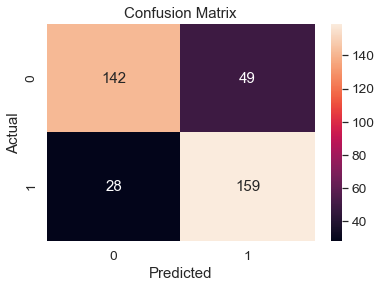

Classification Accuracy: 0.7962962962962963
Classification Error: 0.20370370370370372
False Positive Rate: 0.25654450261780104
Precision: 0.7644230769230769
AUC Score: 0.7968614385306716
Cross-validated AUC: 0.8753623882722146
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 0 1]
First 10 predicted probabilities of class members:
 [[0.09193053 0.90806947]
 [0.95991564 0.04008436]
 [0.96547467 0.03452533]
 [0.78757121 0.21242879]
 [0.38959922 0.61040078]
 [0.05264207 0.94735793]
 [0.75035574 0.24964426]
 [0.19065116 0.80934884]
 [0.61612081 0.38387919]
 [0.47699963 0.52300037]]
First 10 predicted probabilities:
 [[0.90806947]
 [0.04008436]
 [0.03452533]
 [0.21242879]
 [0.61040078]
 [0.94735793]
 [0.24964426]
 [0.80934884]
 [0.38387919]
 [0.52300037]]


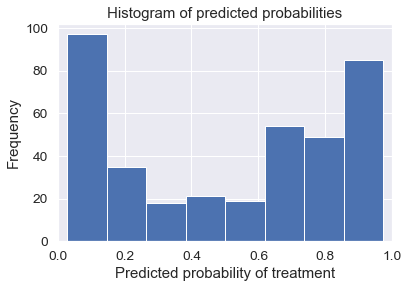

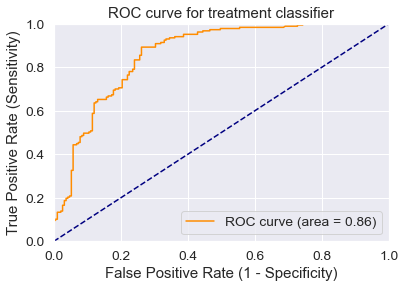

[[142  49]
 [ 28 159]]


In [49]:
logisticRegression()

# KNearestNeighbors 

In [50]:
def Knn():
#calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
    
#define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
#specify "parameter distributions" rather than a "parameter grid"
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    RandomizedSearchCV(knn, param_dist)
    
#train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)
    
#make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    
    print('### KNeighborsClassifier ###')
    
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)

#data for final graph
    methodDict['KNN'] = accuracy_score * 100
    
##^ ref: Markham, K., 2021. Efficiently searching for optimal tuning parameters (video #8). [online] GitHub.

### KNeighborsClassifier ###
Accuracy: 0.8042328042328042
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


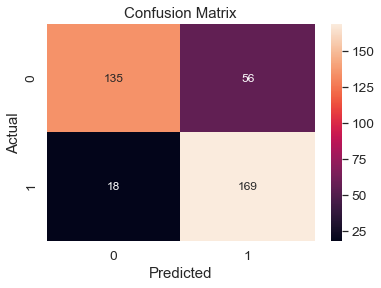

Classification Accuracy: 0.8042328042328042
Classification Error: 0.1957671957671958
False Positive Rate: 0.2931937172774869
Precision: 0.7511111111111111
AUC Score: 0.8052747991152673
Cross-validated AUC: 0.8782819116296456
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.33333333 0.66666667]
 [1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.37037037 0.62962963]
 [0.03703704 0.96296296]
 [0.59259259 0.40740741]
 [0.37037037 0.62962963]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]]
First 10 predicted probabilities:
 [[0.66666667]
 [0.        ]
 [0.        ]
 [0.33333333]
 [0.62962963]
 [0.96296296]
 [0.40740741]
 [0.62962963]
 [0.66666667]
 [0.66666667]]


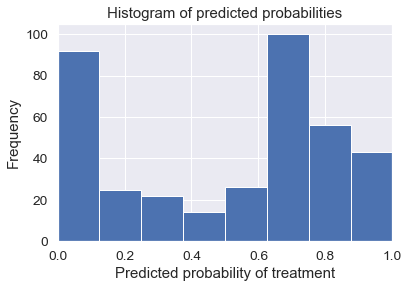

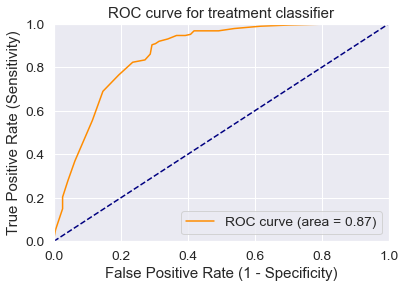

[[135  56]
 [ 18 169]]


In [51]:
Knn()

# Decision Tree 

In [52]:
def treeClassifier():
#calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    RandomizedSearchCV(tree, param_dist)
    
#train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    
#make class predictions for the testing set
    y_pred_class = tree.predict(X_test)
    
    print('### Tree classifier ###')
    
    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)

#data for final graph
    methodDict['Tree clas.'] = accuracy_score * 100

### Tree classifier ###
Accuracy: 0.8068783068783069
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


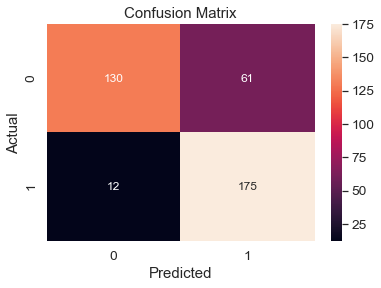

Classification Accuracy: 0.8068783068783069
Classification Error: 0.19312169312169314
False Positive Rate: 0.3193717277486911
Precision: 0.7415254237288136
AUC Score: 0.8082285746283282
Cross-validated AUC: 0.8796535168726989
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.18       0.82      ]
 [0.95121951 0.04878049]
 [0.95121951 0.04878049]
 [0.95121951 0.04878049]
 [0.36097561 0.63902439]
 [0.18       0.82      ]
 [0.95121951 0.04878049]
 [0.11320755 0.88679245]
 [0.36097561 0.63902439]
 [0.36097561 0.63902439]]
First 10 predicted probabilities:
 [[0.82      ]
 [0.04878049]
 [0.04878049]
 [0.04878049]
 [0.63902439]
 [0.82      ]
 [0.04878049]
 [0.88679245]
 [0.63902439]
 [0.63902439]]


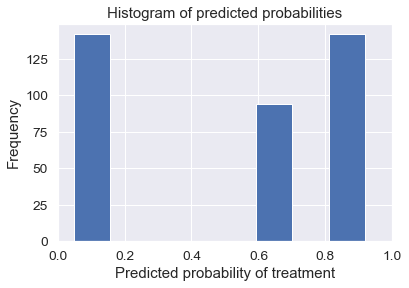

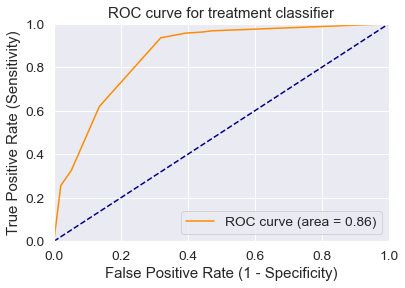

[[130  61]
 [ 12 175]]


In [53]:
treeClassifier()

# Random Forest 

In [56]:
def randomForest():
#calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest, param_dist)
    
#building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)
    
#make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)
    
    print('### Random Forests ###')
    
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

#data for final graph
    methodDict['R. Forest'] = accuracy_score * 100
    
    return forest

Rand. Best Score:  0.8305206349206349
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}
[0.833, 0.831, 0.831, 0.831, 0.833, 0.831, 0.832, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.832, 0.831, 0.831, 0.831, 0.831]
### Random Forests ###
Accuracy: 0.8121693121693122
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


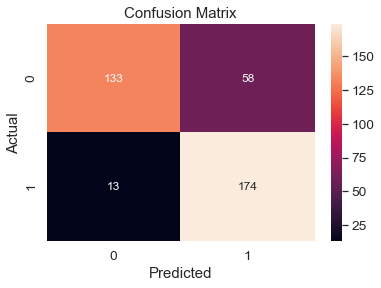

Classification Accuracy: 0.8121693121693122
Classification Error: 0.1878306878306878
False Positive Rate: 0.3036649214659686
Precision: 0.75
AUC Score: 0.8134081809782457
Cross-validated AUC: 0.8934280651104528
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.2555794  0.7444206 ]
 [0.95069083 0.04930917]
 [0.93851009 0.06148991]
 [0.87096597 0.12903403]
 [0.40653554 0.59346446]
 [0.17282958 0.82717042]
 [0.89450448 0.10549552]
 [0.4065912  0.5934088 ]
 [0.20540631 0.79459369]
 [0.19337644 0.80662356]]
First 10 predicted probabilities:
 [[0.7444206 ]
 [0.04930917]
 [0.06148991]
 [0.12903403]
 [0.59346446]
 [0.82717042]
 [0.10549552]
 [0.5934088 ]
 [0.79459369]
 [0.80662356]]


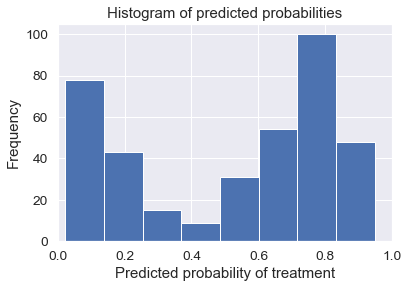

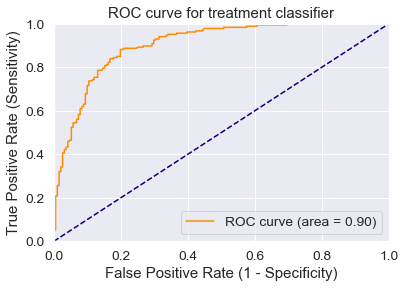

[[133  58]
 [ 13 174]]


In [59]:
model_randomforest=randomForest()

# Predicting with Neural Network

In [60]:
# !pip install --upgrade tensorflow-estimator==2.6.0

In [64]:
#creating input functions
import tensorflow as tf
import argparse


batch_size = 100
train_steps = 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

def train_input_fn(features, labels, batch_size):
    """An input function for training"""
#convert the inputs to a dataset
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

# Shuffle, repeat, and batch the examples.
    return dataset.shuffle(1000).repeat().batch(batch_size)

##ref: Morgan, A., 2018. A Developer's intro to TensorFlow and Keras. [online] Scott Logic. & Hui, J., 2017. “TensorFlow Estimator”. [online] Jhui.github.io.

def eval_input_fn(features, labels, batch_size):
    """An input function for evaluation or prediction"""
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)

#convert the inputs to a dataset
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

#batch the examples
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

#return the dataset
    return dataset

# Define the feature columns

In [75]:
#define Tensorflow feature columns
age = tf.feature_column.numeric_column("Age")
gender = tf.feature_column.numeric_column("Gender")
family_history = tf.feature_column.numeric_column("family_history")
benefits = tf.feature_column.numeric_column("benefits")
care_options = tf.feature_column.numeric_column("care_options")
anonymity = tf.feature_column.numeric_column("anonymity")
leave = tf.feature_column.numeric_column("leave")
work_interfere = tf.feature_column.numeric_column("work_interfere")
feature_columns = [age, gender, family_history, benefits, care_options, anonymity, leave, work_interfere]

# Instantiate an Estimator

In [76]:
# from tensorflow.compat.v1.estimator.experimental import dnn_logit_fn_builder
# from tensorflow_estimator.python.estimator.canned.dnn import dnn_logit_fn_builder
# !pip install tf-nightly

In [77]:
#using tf.estimator.DNNClassifier for deep models that perform multi-class classification to predict

#build a DNN with 2 hidden layers and 10 nodes in each hidden layer.
model = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                    hidden_units=[10, 10],
                                    optimizer=tf.keras.optimizers.Adagrad(
                                      learning_rate=0.1,
#                                       l1_regularization_strength=0.001
                                    ))

##^ tensorflow ref: W3cub, 2020. TensorFlow Guide - W3cubDocs. [online] Docs.w3cub.com. & TensorFlow, 2022. tf.estimator.DNNClassifier. [online] TensorFlow.

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\44792\\AppData\\Local\\Temp\\tmpngzao09x', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


# Model Training 

In [78]:
#the steps argument tells the method to stop training after a number of training steps
model.train(input_fn=lambda:train_input_fn(X_train, y_train, batch_size), steps=train_steps)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\44792\AppData\Local\Temp\tmpngzao09x\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.7259845, step = 0
INFO:tensorflow:global_step/sec: 464.74
INFO:tensorflow:loss = 0.48249412, step = 100 (0.217 sec)
INFO:tensorflow:global_step/sec: 648.735
INFO:tensorflow:loss = 0.4217324, step = 200 (0.154 sec)
INFO:tensorflow:global_step/sec: 553.057
INFO:tensorflow:loss = 0.40212917, step = 300 (0.181 sec)
INFO:tensorflow:global_step/sec: 612.551
INFO:tensorflow:loss = 0.37956998, step = 400 (0.163 sec)
INFO:tensorflow:global_step/sec: 650.613
INFO:tensorflow:loss = 0.3442922

# Evaluation of the trained model

In [79]:
#evaluate the model
eval_result = model.evaluate(
    input_fn=lambda:eval_input_fn(X_test, y_test, batch_size))

print('\nTest set accuracy: {accuracy:0.2f}\n'.format(**eval_result))

#data for final graph
accuracy = eval_result['accuracy'] * 100
methodDict['NN DNNClasif.'] = accuracy

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-04-23T15:10:36
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\44792\AppData\Local\Temp\tmpngzao09x\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.56791s
INFO:tensorflow:Finished evaluation at 2022-04-23-15:10:36
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.8121693, accuracy_baseline = 0.505291, auc = 0.88840044, auc_precision_recall = 0.85664, average_loss = 0.4219399, global_step = 1000, label/mean = 0.49470899, loss = 0.4234065, precision = 0.75, prediction/mean = 0.50508994, recall = 0.93048126
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\44792\AppData\Local\Temp\tmpngzao09x\model.ckpt-1000

Test set accuracy: 0.81



# Make predictions from the trained model

In [80]:
#using the trained model to predict whether a patient will neeed treatment or not
predictions = list(model.predict(input_fn=lambda:eval_input_fn(X_train, y_train, batch_size=batch_size)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\44792\AppData\Local\Temp\tmpngzao09x\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [81]:
#generate predictions from the model
template = ('\nIndex: "{}", Prediction is "{}" ({:.1f}%), expected "{}"')

#dictionary for predictions
col1 = []
col2 = []
col3 = []


for idx, input, p in zip(X_train.index, y_train, predictions):
    v  = p["class_ids"][0] 
    class_id = p['class_ids'][0]
    probability = p['probabilities'][class_id] #probability
    
#adding to dataframe
    col1.append(idx) #index
    col2.append(v) #prediction
    col3.append(input) #expecter
    
   
 #print(template.format(idx, v, 100 * probability, input))


results = pd.DataFrame({'index':col1, 'prediction':col2, 'expected':col3})
results.head()

,index,prediction,expected
0,929,0,0
1,901,1,1
2,579,1,1
3,367,1,1
4,615,1,1


# Plot of successful methods

In [82]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
#colors
    ax = s.plot(kind='bar') 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')
     
    plt.show()

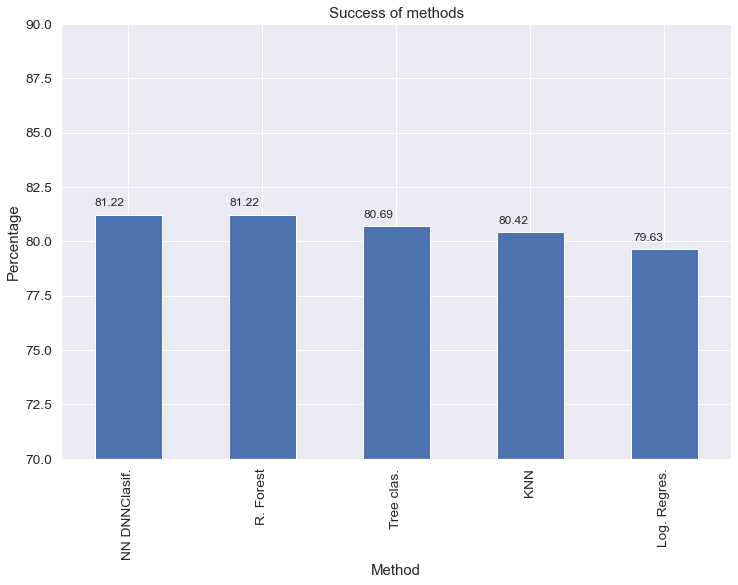

In [83]:
plotSuccess()

# Testing - Creating predictions on test set

In [84]:
#generate predictions with the best method
clf = model_randomforest
clf.fit(X, y)
dfTestPredictions = clf.predict(X_test)

# Results

In [86]:
#write predictions to csv file
#there's no significative field so the index is saved
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
#save to file

#this file will be visible after publishing in the output section
results.to_csv('results.csv', index=False)
results

,Index,Treatment
0,5,1
1,494,0
2,52,0
3,984,0
4,186,0
...,...,...
373,1084,1
374,506,0
375,1142,0
376,1124,0
